In [1]:
import torch
import torchgeometry as tgm

import cv2

In [2]:
# read the image with OpenCV
image = cv2.imread('./data/bennett_aden.png')[..., (2,1,0)]
print(image.shape)

img = tgm.image_to_tensor(image)
img = torch.unsqueeze(img.float(), dim=0)  # BxCxHxW

(200, 250, 3)


In [3]:
# create transformation (rotation)
alpha = tgm.pi / 4  # (45deg)
M = torch.tensor([[
    [torch.cos(alpha), -torch.sin(alpha), 0.],
    [torch.sin(alpha),  torch.cos(alpha), 0.],
    [              0.,                0., 1.],
]])  # Bx3x3

# apply transformation to original image
_, _, h, w = img.shape
img_warped = tgm.warp_perspective(img, M, dsize=(h, w))

# convert back to numpy
image_warped = tgm.tensor_to_image(img_warped.byte())

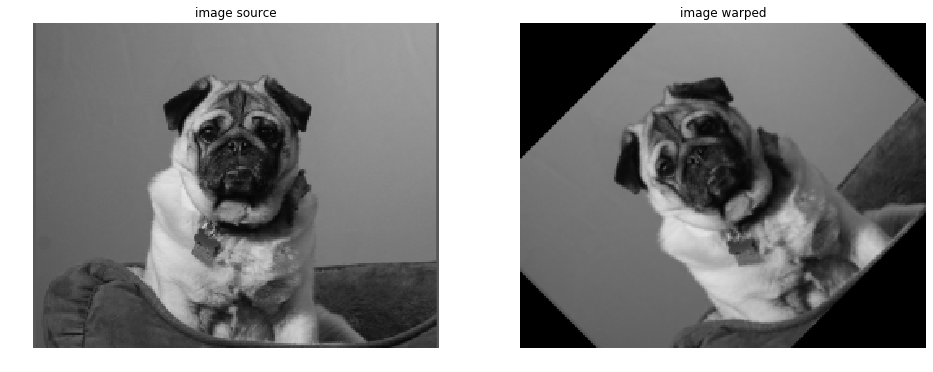

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline

# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(image)

axs[1].axis('off')
axs[1].set_title('image warped')
axs[1].imshow(image_warped)